## Manahil Fatima Anwar
## 20K-0134
## BAI-7A
## CV Lab 06 - Class Tasks

## Watershed Segmentation

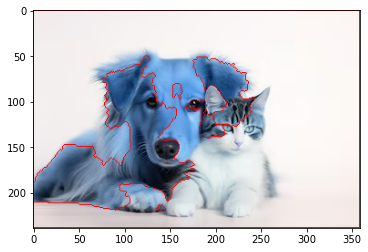

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('cattodoggo.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((5, 5), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

sure_bg = cv2.dilate(opening, kernel, iterations = 3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.2 * dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]

plt.imshow(image)
plt.axis('on')
plt.show()

## Cluster-Based Segmentation

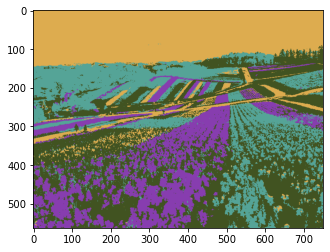

In [2]:
image = cv2.imread('flowers.jpg')

pixel_values = image.reshape((-1, 3))

pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
K = 4
_, labels, centers = cv2.kmeans(pixel_values, K, None, criteria, 50, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]

segmented_image = segmented_image.reshape(image.shape)

cv2.imshow('Segmented Image', segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(segmented_image)
plt.axis('on')
plt.show()